# CVE data analysis

Load the file, remove invalid bulletin dates, convert date fields to datetime so that we can do math operations on them

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import csv

RECENT = True
REMOVE_NAT = False
CATEGORIES = [
    "system", 
    "framework", 
    "media framework",
    "kernel", 
    "runtime", 
    "qualcomm", 
]

def show_table(table):
  display(HTML(table.to_html()))

cves = "drive/My Drive/cves_temp/aggregated-severity-cat-google-play.csv"
bulletin_dates = "drive/My Drive/cves_temp/bulletin_dates.csv"

date_dict = dict()

with open(bulletin_dates, "r") as csvfile:
  r = csv.reader(csvfile)
  for row in r:
    date_dict[row[0]] = row[1]

df = pd.read_csv(cves)
# filter android version bulletin
df = df[df["bulletin_date"] != "android-13"]
df = df[df["bulletin_date"] != "android-12"]
df = df[df["bulletin_date"] != "android-11"]
df = df[df["bulletin_date"] != "android-10"]
# convert to datetime
df['bulletin_publish'] = pd.to_datetime(df['bulletin_date'], infer_datetime_format=True, errors='coerce', utc=True)
df['bulletin_date'] = pd.to_datetime(df['bulletin_publish'].to_numpy().astype('datetime64[M]'), infer_datetime_format=True, errors='coerce', utc=True)
df['published'] = pd.to_datetime(df['published'], infer_datetime_format=True, errors='coerce', utc=True)
df['modified'] = pd.to_datetime(df['modified'], infer_datetime_format=True, errors='coerce', utc=True)
df['commit_start'] = pd.to_datetime(df['commit_start'], infer_datetime_format=True, errors='coerce', utc=True)
df['commit_end'] = pd.to_datetime(df['commit_end'], infer_datetime_format=True, errors='coerce', utc=True)
# remove bulletins without categories
df = df[df["bulletin_date"] >= "2017-06-01"]
# filter for recent bulletins
if RECENT:
  df = df[df['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2019-10')]
  df = df[df['bulletin_date'].dt.tz_localize(None) < np.datetime64('2023-01')]
if REMOVE_NAT:
  df = df.dropna(subset=["commit_end"])
# join categories
df["category"] = df["category"] \
  .map(lambda x: "qualcomm" if "qualcomm" in x else x) \
  .map(lambda x: "runtime" if "runtime" in x else x) \
  .map(lambda x: "mediatek" if "mediatek" in x else x) \
  .map(lambda x: "amlogic" if "amlogic" in x else x) \
  .map(lambda x: "kernel" if "kernel" in x else x) \
  .map(lambda x: "library" if "libraries" == x else x) \
  .map(lambda x: "system" if "system ui" == x else x)
df.groupby("category")["bulletin_date"].count()

<ipython-input-82-8b2a4488fa06>:43: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df['bulletin_date'] = pd.to_datetime(df['bulletin_publish'].to_numpy().astype('datetime64[M]'), infer_datetime_format=True, errors='coerce', utc=True)


category
amlogic                         3
android tv                      2
arm components                  2
broadcom components             4
fpc components                  9
framework                     226
google play system updates     49
imagination technologies       17
kernel                         95
library                         1
media framework                81
mediatek                      100
multiple components             1
qualcomm                      701
runtime                        13
system                        277
telecommunication               1
unisoc components              53
widevine drm                    2
Name: bulletin_date, dtype: int64

In [ ]:
len(df["id"].unique())

1582

In [ ]:
df[df["category"] == "system"].groupby("bulletin_date").count()

,id,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish
bulletin_date,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,2,2,2,2,2,2,2,2,2,2,2,2
2019-11-01 00:00:00+00:00,9,9,9,9,9,9,9,9,9,9,9,9
2019-12-01 00:00:00+00:00,8,8,8,8,8,8,8,8,8,8,8,8
2020-01-01 00:00:00+00:00,3,3,3,3,3,3,3,3,3,3,3,3
2020-02-01 00:00:00+00:00,6,6,6,6,6,6,6,6,6,6,6,6
2020-03-01 00:00:00+00:00,6,6,6,6,6,6,6,6,6,6,6,6
2020-04-01 00:00:00+00:00,4,4,4,4,4,4,4,4,4,4,4,4
2020-05-01 00:00:00+00:00,8,8,8,8,8,8,8,8,8,8,8,8
2020-06-01 00:00:00+00:00,5,5,5,5,5,5,5,4,4,4,4,5


In [ ]:
len(df[df["category"] == "google play system updates"]["id"].unique())

48

In [ ]:
df.drop_duplicates(subset=["id"]).groupby("category")["id"].count()

category
amlogic                         3
android tv                      2
arm components                  2
broadcom components             4
fpc components                  9
framework                     225
google play system updates      2
imagination technologies       17
kernel                         93
library                         1
media framework                81
mediatek                      100
multiple components             1
qualcomm                      696
runtime                        13
system                        277
telecommunication               1
unisoc components              53
widevine drm                    2
Name: id, dtype: int64

There are some duplicated CVEs. Sometimes they appear in the same bulletin, but mostly in different ones.

If they appear in the same bulletin, sometimes they are in different sections but sometimes they appear in the final credits. Not sure what we should do, for the moment I'm leaving it as is.

In [ ]:
df.duplicated(subset=["id"], keep='first').sum()


55

Compute the number of patches that a specific security patch version is missing (from successive security patches)

In [ ]:
grouped = df.groupby("bulletin_date").count()
sum = grouped.sort_values("bulletin_date")["id"].cumsum()
sum = -1*(sum - max(sum))
patches = pd.DataFrame(sum).rename(columns={"id":"missing patches"})
patches

,missing patches
bulletin_date,
2019-10-01 00:00:00+00:00,1609
2019-11-01 00:00:00+00:00,1572
2019-12-01 00:00:00+00:00,1529
2020-01-01 00:00:00+00:00,1488
2020-02-01 00:00:00+00:00,1463
2020-03-01 00:00:00+00:00,1393
2020-04-01 00:00:00+00:00,1338
2020-05-01 00:00:00+00:00,1299
2020-06-01 00:00:00+00:00,1266


Compute on average how many CVE there are per security patch bulletin

In [ ]:
print("mean CVE per security patch")
grouped.mean()["id"]

mean CVE per security patch


41.97435897435897

Compute the average, maximum and minimun time it takes for a patch to be published in the security bulletin after the final commit

In [ ]:
#diff = df["bulletin_date"] - df["commit_end"]
diff = df["bulletin_publish"] - df["commit_end"]

df["diff"] = diff
print(diff.mean())
print(diff.median())
print(diff.max())
print(diff.min())

117 days 04:35:08.788874842
68 days 00:01:26
1434 days 21:34:14
-563 days +10:15:48


Do the same but for specific categories

In [ ]:
def print_stats(df):
  for cat in CATEGORIES:
    df_cat = df[df["category"] == cat]
    print(cat)
    print(f"mean: {df_cat['diff'].mean()}")
    print(f"median: {df_cat['diff'].median()}")
    print(f"max: {df_cat['diff'].max()}")
    print(f"min: {df_cat['diff'].min()}")
    print(f"25%: {df_cat['diff'].quantile(0.75)}")
    print(f"CVSS avg. score: {df_cat['nvd_score_v3'].mean()}")

print_stats(df.drop_duplicates(subset=["id"]))

system
mean: 69 days 23:24:50.369402985
median: 53 days 23:23:01
max: 409 days 04:40:15
min: 32 days 23:57:30
25%: 75 days 04:37:07.500000
CVSS avg. score: 7.182181818181818
framework
mean: 82 days 17:01:01.152073733
median: 54 days 04:52:40
max: 635 days 23:29:55
min: 34 days 03:03:51
25%: 88 days 14:25:02
CVSS avg. score: 6.904464285714285
media framework
mean: 72 days 10:41:36.910256410
median: 54 days 13:44:27
max: 243 days 04:28:33
min: 40 days 00:39:08
25%: 77 days 00:19:13
CVSS avg. score: 7.201234567901234
kernel
mean: 215 days 16:19:26.821428572
median: 150 days 07:11:22
max: 1434 days 21:34:14
min: 46 days 08:59:36
25%: 262 days 19:54:24.250000
CVSS avg. score: 6.749462365591396
runtime
mean: 88 days 08:59:00.181818182
median: 89 days 01:05:55
max: 157 days 01:13:09
min: 47 days 02:13:57
25%: 95 days 14:56:17.500000
CVSS avg. score: 7.699999999999999
qualcomm
mean: 242 days 09:09:12.393700788
median: 167 days 16:56:27
max: 990 days 10:02:59
min: -563 days +10:15:48
25%: 294 d

In [ ]:
df.drop_duplicates(subset=["id"])

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
0,CVE-2022-20419,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-10-11 00:00:00+00:00,2022-10-11 00:00:00+00:00,2022-08-03 18:48:33+00:00,2022-08-19 18:43:19+00:00,NaN,NaN,HIGH,7.8,2022-10-03 00:00:00+00:00,44 days 05:16:41
1,CVE-2022-20420,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-10-11 00:00:00+00:00,2022-10-11 00:00:00+00:00,2022-07-14 01:16:52+00:00,2022-08-19 18:43:09+00:00,NaN,NaN,HIGH,7.8,2022-10-03 00:00:00+00:00,44 days 05:16:51
2,CVE-2022-20351,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-10-11 00:00:00+00:00,2022-10-11 00:00:00+00:00,2022-04-28 23:53:40+00:00,2022-05-10 15:30:44+00:00,NaN,NaN,MEDIUM,5.5,2022-10-03 00:00:00+00:00,145 days 08:29:16
3,CVE-2021-39624,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-03-16 00:00:00+00:00,2022-06-15 00:00:00+00:00,2022-03-31 02:06:06+00:00,2022-03-31 02:38:58+00:00,MEDIUM,4.9,MEDIUM,5.5,2022-10-03 00:00:00+00:00,185 days 21:21:02
4,CVE-2021-39758,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-03-30 00:00:00+00:00,2022-03-30 00:00:00+00:00,2021-11-24 15:49:43+00:00,2021-11-25 10:42:47+00:00,MEDIUM,4.6,HIGH,7.8,2022-10-03 00:00:00+00:00,311 days 13:17:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,CVE-2020-11175,2020-11-01 00:00:00+00:00,2020-11-01,qualcomm,2020-11-12 00:00:00+00:00,2020-11-12 00:00:00+00:00,NaT,NaT,HIGH,7.2,HIGH,7.8,2020-11-02 00:00:00+00:00,NaT
3407,CVE-2020-11184,2020-11-01 00:00:00+00:00,2020-11-01,qualcomm,2020-11-12 00:00:00+00:00,2020-11-12 00:00:00+00:00,NaT,NaT,HIGH,10.0,CRITICAL,9.8,2020-11-02 00:00:00+00:00,NaT
3408,CVE-2020-11193,2020-11-01 00:00:00+00:00,2020-11-01,qualcomm,2020-11-12 00:00:00+00:00,2020-11-12 00:00:00+00:00,NaT,NaT,HIGH,10.0,CRITICAL,9.8,2020-11-02 00:00:00+00:00,NaT
3409,CVE-2020-11196,2020-11-01 00:00:00+00:00,2020-11-01,qualcomm,2020-11-12 00:00:00+00:00,2020-11-12 00:00:00+00:00,NaT,NaT,HIGH,10.0,CRITICAL,9.8,2020-11-02 00:00:00+00:00,NaT


There are some outliers it seems, so maybe we should clean the data?

There are also some patches that are published in the bulletin before the final commit, how does that work?

In [ ]:
df[diff < np.timedelta64(0)]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
781,CVE-2020-11120,2020-08-01 00:00:00+00:00,2020-08-01,qualcomm,2020-09-08 00:00:00+00:00,2020-09-08 00:00:00+00:00,2019-11-14 08:54:01+00:00,2021-12-17 05:50:33+00:00,MEDIUM,4.6,HIGH,7.8,2020-08-03 00:00:00+00:00,-502 days +18:09:27
2004,CVE-2021-1978,2021-08-01 00:00:00+00:00,2021-08-01,qualcomm,NaT,NaT,2021-01-29 10:38:36+00:00,2021-12-02 08:33:59+00:00,NaN,NaN,NaN,NaN,2021-08-02 00:00:00+00:00,-123 days +15:26:01
2892,CVE-2019-2304,2019-12-01 00:00:00+00:00,2019-12-01,qualcomm,2019-12-18 00:00:00+00:00,2019-12-18 00:00:00+00:00,2018-10-17 16:36:11+00:00,2021-06-16 13:44:12+00:00,HIGH,7.2,HIGH,7.8,2019-12-02 00:00:00+00:00,-563 days +10:15:48


Count the number of patches that take more than a year after the last commit to be published in the bulletin

In [ ]:
df[diff > np.timedelta64(1, 'Y')]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
99,CVE-2020-10768,2021-10-01 00:00:00+00:00,2021-10-01,kernel,2020-09-15 00:00:00+00:00,2020-09-15 00:00:00+00:00,2020-06-07 12:44:19+00:00,2020-06-09 08:50:55+00:00,LOW,2.1,MEDIUM,5.5,2021-10-04 00:00:00+00:00,481 days 15:09:05
524,CVE-2018-11843,2020-01-01 00:00:00+00:00,2020-01-01,qualcomm,2018-09-18 00:00:00+00:00,2018-09-19 00:00:00+00:00,2018-04-13 13:21:21+00:00,2018-04-19 09:23:57+00:00,HIGH,7.2,HIGH,7.8,2020-01-06 00:00:00+00:00,626 days 14:36:03
528,CVE-2019-10602,2020-01-01 00:00:00+00:00,2020-01-01,qualcomm,2020-01-21 00:00:00+00:00,2020-01-21 00:00:00+00:00,2018-03-15 11:11:48+00:00,2018-03-15 11:13:40+00:00,HIGH,7.2,HIGH,7.8,2020-01-06 00:00:00+00:00,661 days 12:46:20
529,CVE-2019-10606,2020-01-01 00:00:00+00:00,2020-01-01,qualcomm,2020-01-21 00:00:00+00:00,2020-01-21 00:00:00+00:00,2018-03-26 05:12:25+00:00,2018-10-15 06:18:26+00:00,HIGH,7.2,HIGH,7.8,2020-01-06 00:00:00+00:00,447 days 17:41:34
534,CVE-2019-14036,2020-01-01 00:00:00+00:00,2020-01-01,qualcomm,2020-01-21 00:00:00+00:00,2020-01-21 00:00:00+00:00,2018-03-06 12:38:26+00:00,2018-03-28 05:57:38+00:00,HIGH,7.2,HIGH,7.8,2020-01-06 00:00:00+00:00,648 days 18:02:22
698,CVE-2019-14053,2020-05-01 00:00:00+00:00,2020-05-01,qualcomm,2020-06-02 00:00:00+00:00,2020-06-02 00:00:00+00:00,2018-09-07 21:50:31+00:00,2018-10-26 15:52:12+00:00,LOW,3.6,HIGH,7.1,2020-05-04 00:00:00+00:00,555 days 08:07:48
699,CVE-2019-14087,2020-05-01 00:00:00+00:00,2020-05-01,qualcomm,2020-06-02 00:00:00+00:00,2020-06-02 00:00:00+00:00,2017-11-28 21:03:42+00:00,2017-11-29 16:32:28+00:00,HIGH,7.2,HIGH,7.8,2020-05-04 00:00:00+00:00,886 days 07:27:32
1330,CVE-2019-9376,2021-01-01 00:00:00+00:00,2021-01-01,framework,2019-09-27 00:00:00+00:00,2021-01-11 00:00:00+00:00,2019-04-08 23:13:21+00:00,2019-04-09 00:30:05+00:00,MEDIUM,4.9,MEDIUM,5.5,2021-01-04 00:00:00+00:00,635 days 23:29:55
1397,CVE-2019-9460,2020-06-01 00:00:00+00:00,2020-06-01,system,2019-09-27 00:00:00+00:00,2020-03-17 00:00:00+00:00,2019-04-17 20:15:02+00:00,2019-04-18 19:19:45+00:00,NaN,NaN,NaN,NaN,2020-06-01 00:00:00+00:00,409 days 04:40:15
1401,CVE-2017-9704,2020-06-01 00:00:00+00:00,2020-06-01,qualcomm,2018-12-20 00:00:00+00:00,2018-12-20 00:00:00+00:00,2017-05-25 09:20:42+00:00,2017-09-14 13:57:01+00:00,HIGH,7.2,HIGH,7.8,2020-06-01 00:00:00+00:00,990 days 10:02:59


In [ ]:
df_late = df[diff > np.timedelta64(6, 'M')]
#df_late = df_late[df_late['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2021-01')]
#df_late = df_late[df_late['bulletin_date'].dt.tz_localize(None) < np.datetime64('2022-01')]
late = len(df_late.index)

df_tot = df
#df_tot = df_tot[df_tot['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2021-01')]
#df_tot = df_tot[df_tot['bulletin_date'].dt.tz_localize(None) < np.datetime64('2022-01')]
tot = len(df_tot.index)
print(f"late: {late}")
print(f"tot: {tot}")
print(f"percent: {late/tot * 100}%")
df_late.groupby("category")["category"].count()

late: 119
tot: 1637
percent: 7.269395235186317%


category
framework          17
kernel             34
media framework     3
qualcomm           57
system              8
Name: category, dtype: int64

More than 2 years...


In [ ]:
df[diff > np.timedelta64(2, 'Y')]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
699,CVE-2019-14087,2020-05-01 00:00:00+00:00,2020-05-01,qualcomm,2020-06-02 00:00:00+00:00,2020-06-02 00:00:00+00:00,2017-11-28 21:03:42+00:00,2017-11-29 16:32:28+00:00,HIGH,7.2,HIGH,7.8,2020-05-04 00:00:00+00:00,886 days 07:27:32
1401,CVE-2017-9704,2020-06-01 00:00:00+00:00,2020-06-01,qualcomm,2018-12-20 00:00:00+00:00,2018-12-20 00:00:00+00:00,2017-05-25 09:20:42+00:00,2017-09-14 13:57:01+00:00,HIGH,7.2,HIGH,7.8,2020-06-01 00:00:00+00:00,990 days 10:02:59
2553,CVE-2017-18509,2021-02-01 00:00:00+00:00,2021-02-01,kernel,2019-08-13 00:00:00+00:00,2019-10-09 00:00:00+00:00,2017-02-24 08:29:06+00:00,2017-02-27 02:25:46+00:00,HIGH,7.2,HIGH,7.8,2021-02-01 00:00:00+00:00,1434 days 21:34:14
2850,CVE-2019-14044,2020-02-01 00:00:00+00:00,2020-02-01,qualcomm,2020-02-07 00:00:00+00:00,2020-02-07 00:00:00+00:00,2017-12-14 20:06:37+00:00,2018-01-19 12:09:41+00:00,HIGH,7.2,HIGH,7.8,2020-02-03 00:00:00+00:00,744 days 11:50:19


There are 5 CVE that took more than 3 years to appear in the bulletin, however this was back in 2016-2018

In [ ]:
df[diff > np.timedelta64(3, 'Y')]

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
2553,CVE-2017-18509,2021-02-01 00:00:00+00:00,2021-02-01,kernel,2019-08-13 00:00:00+00:00,2019-10-09 00:00:00+00:00,2017-02-24 08:29:06+00:00,2017-02-27 02:25:46+00:00,HIGH,7.2,HIGH,7.8,2021-02-01 00:00:00+00:00,1434 days 21:34:14


Remove outliers and see what the stats are like

In [ ]:
diff_clean = diff[diff < np.timedelta64(1, 'Y')][diff >= np.timedelta64(0)]
#diff_clean = diff[diff < np.timedelta64(1, 'Y')]
#diff_clean = diff_clean[diff_clean >= np.timedelta64(0)]
print(f"mean: {diff_clean.mean()}")
print(f"max: {diff_clean.max()}")
print(f"min: {diff_clean.min()}")
print(f"median: {diff_clean.median()}")

mean: 94 days 00:56:00.509358288
max: 362 days 09:12:13
min: 32 days 23:57:30
median: 62 days 05:18:11


Do the same for specific categories

In [ ]:
df_clean = df.copy()
df_clean["diff"] = diff_clean

print_stats(df_clean)

system
mean: 68 days 16:55:20.614232210
median: 53 days 23:22:55
max: 362 days 09:12:13
min: 32 days 23:57:30
25%: 75 days 04:01:23
CVSS avg. score: 7.182181818181818
framework
mean: 78 days 00:19:37.731481481
median: 54 days 02:25:20
max: 311 days 13:17:13
min: 34 days 03:03:51
25%: 88 days 10:18:36.500000
CVSS avg. score: 6.904464285714285
media framework
mean: 72 days 10:41:36.910256410
median: 54 days 13:44:27
max: 243 days 04:28:33
min: 40 days 00:39:08
25%: 77 days 00:19:13
CVSS avg. score: 7.201234567901234
kernel
mean: 152 days 06:15:26.733333334
median: 138 days 23:41:12
max: 332 days 16:24:03
min: 46 days 08:59:36
25%: 204 days 01:45:28
CVSS avg. score: 6.771578947368419
runtime
mean: 88 days 08:59:00.181818182
median: 89 days 01:05:55
max: 157 days 01:13:09
min: 47 days 02:13:57
25%: 95 days 14:56:17.500000
CVSS avg. score: 7.699999999999999
qualcomm
mean: 173 days 01:03:42.836734694
median: 150 days 19:07:41
max: 337 days 17:26:36
min: 101 days 13:20:52
25%: 200 days 23:15:

In [ ]:
ids = [
    "CVE-2019-9376",
    "CVE-2021-0313",
    "CVE-2021-0341",
    "CVE-2021-0604",
    "CVE-2021-0444",
    "CVE-2021-0521",
    "CVE-2021-0591",
    "CVE-2018-9493",
    "CVE-2018-9452",
    "CVE-2018-9525",
    "CVE-2018-9548",
    "CVE-2021-0931",
    "CVE-2018-9582",
    "CVE-2019-2003",
    "CVE-2019-2232",
    "CVE-2018-9467",
    "CVE-2020-0239",
    "CVE-2020-0441",
    "CVE-2020-0459",
    "CVE-2020-0391",
    "CVE-2021-1929",
    "CVE-2020-0014",
    "CVE-2019-2137",
    "CVE-2020-0443",
    "CVE-2021-0597",
]

df[df["id"].isin(ids)][["id", "category", "diff", "nvd_score_v3", "nvd_severity_v3"]]

,id,category,diff,nvd_score_v3,nvd_severity_v3
49,CVE-2021-0521,framework,108 days 05:40:16,5.5,MEDIUM
730,CVE-2021-0597,system,113 days 04:45:53,5.5,MEDIUM
732,CVE-2021-0604,system,47 days 23:58:58,5.5,MEDIUM
758,CVE-2020-0239,framework,53 days 23:23:28,5.5,MEDIUM
1317,CVE-2021-0313,framework,46 days 01:08:25,7.5,HIGH
1330,CVE-2019-9376,framework,635 days 23:29:55,5.5,MEDIUM
1739,CVE-2021-0444,framework,54 days 22:35:29,5.5,MEDIUM
1809,CVE-2020-0391,framework,83 days 01:39:26,7.8,HIGH
1979,CVE-2021-0591,system,73 days 23:58:18,7.3,HIGH
2471,CVE-2021-0931,system,46 days 23:49:42,5.5,MEDIUM


Let's look at the severity of the CVEs

In [ ]:
display(df[["id", "nvd_severity_v3"]].groupby("nvd_severity_v3").count())
print(f"mean: {df['nvd_score_v3'].mean()}")
print(f"median: {df['nvd_score_v3'].median()}")


,id
nvd_severity_v3,
CRITICAL,278
HIGH,940
LOW,14
MEDIUM,393


mean: 7.538276923076922
median: 7.8


In [ ]:
df_severity = df[df["category"].isin(CATEGORIES)]
display(df_severity[["id", "nvd_severity_v3", "category"]].groupby(["category", "nvd_severity_v3"]).count())
display(df_severity[["id", "nvd_score_v3", "category"]].groupby(["category"]).mean())
display(df_severity[["id", "nvd_score_v3", "category"]].groupby(["category"]).median())


id
category        nvd_severity_v3     
framework       CRITICAL           3
                HIGH             141
                LOW                6
                MEDIUM            74
kernel          CRITICAL           2
                HIGH              51
                LOW                1
                MEDIUM            41
media framework CRITICAL           4
                HIGH              44
                MEDIUM            33
qualcomm        CRITICAL         187
                HIGH             446
                LOW                2
                MEDIUM            63
runtime         CRITICAL           2
                HIGH               8
                MEDIUM             3
system          CRITICAL          32
                HIGH             141
                LOW                5
                MEDIUM            97

,nvd_score_v3
category,
framework,6.904464
kernel,6.771579
media framework,7.201235
qualcomm,8.030946
runtime,7.700000
system,7.182182


,nvd_score_v3
category,
framework,7.8
kernel,7.0
media framework,7.8
qualcomm,7.8
runtime,7.8
system,7.5


In [ ]:
print(f"mean: {df['nvd_score_v3'].mean()}")
print(f"median: {df['nvd_score_v3'].median()}")

mean: 7.538276923076922
median: 7.8


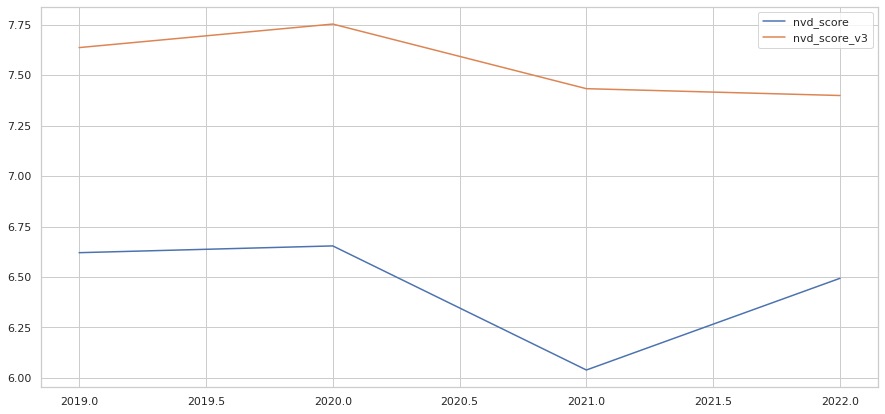

In [ ]:
grouped = df.groupby(lambda i: df["bulletin_date"][i].year)
grouped.mean().plot()

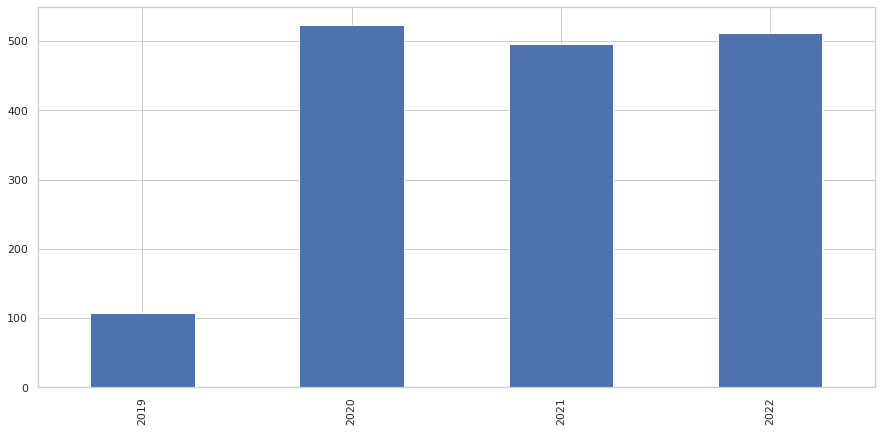

In [ ]:
grouped.count()["id"].plot(kind='bar')

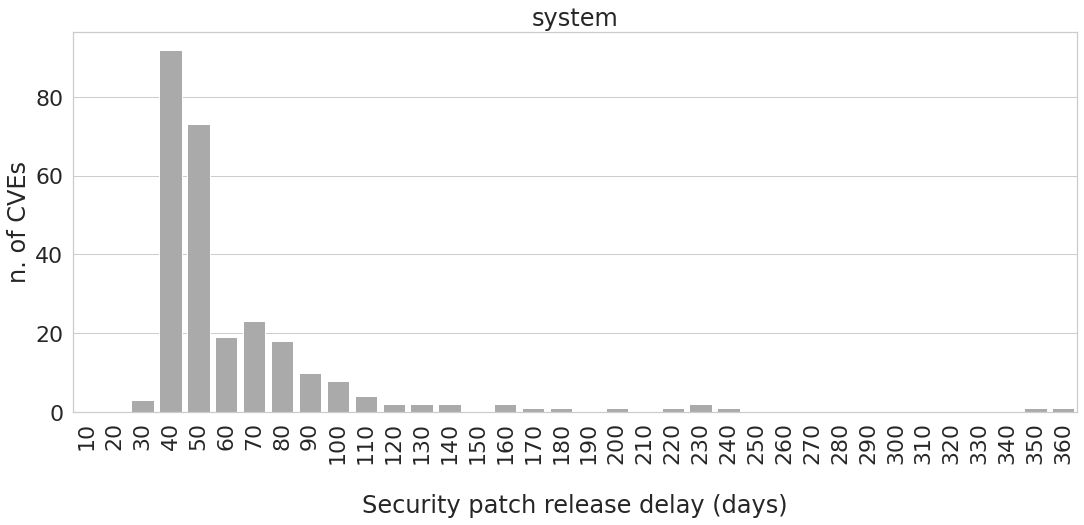

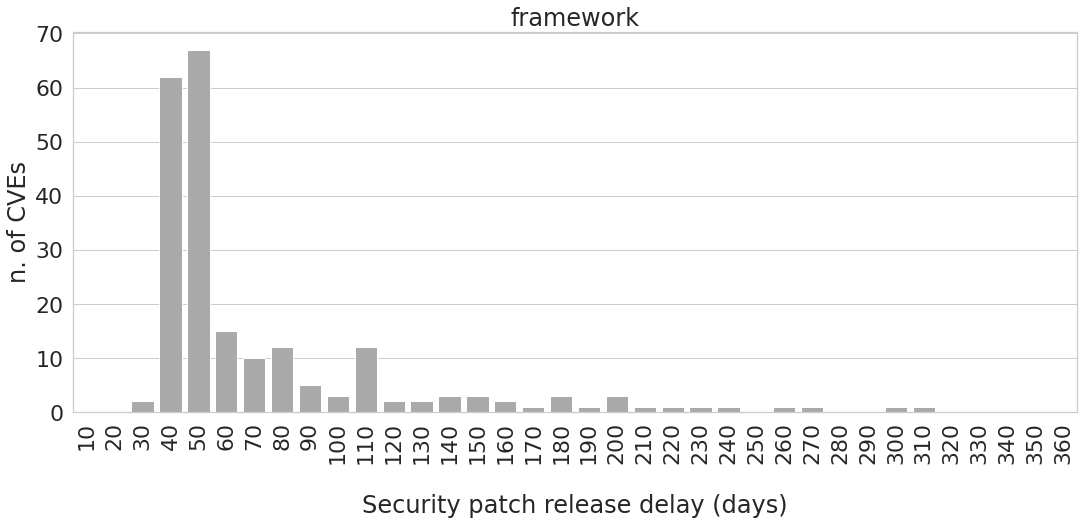

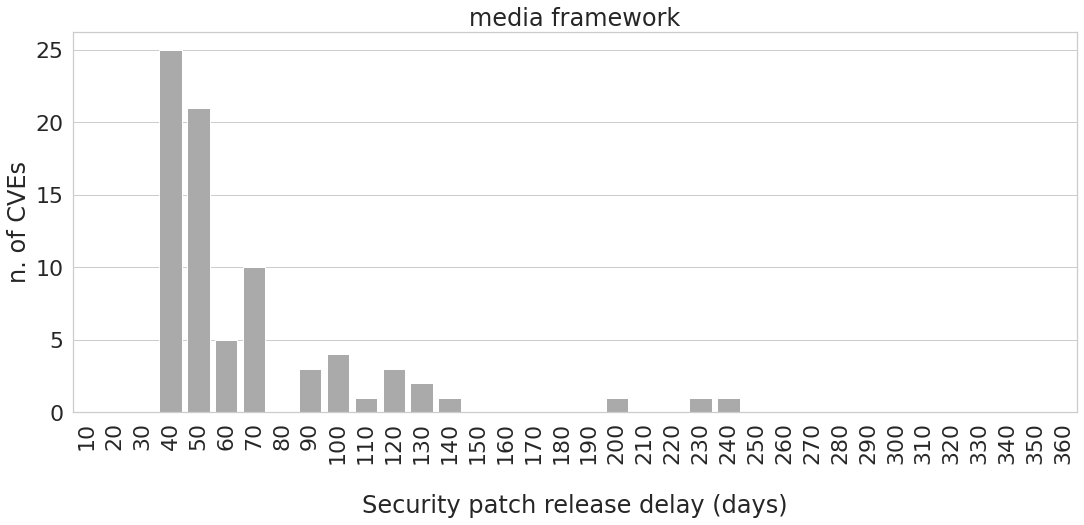

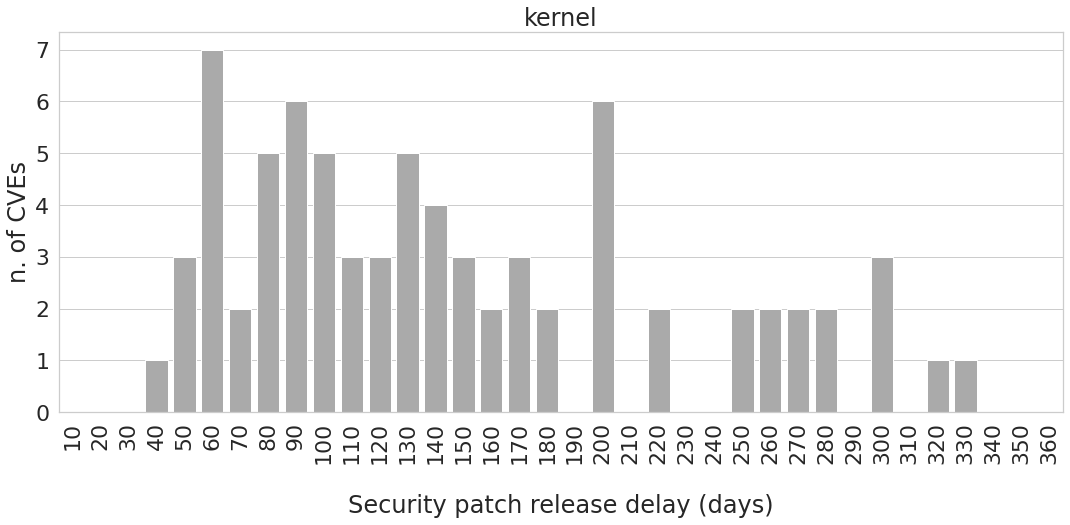

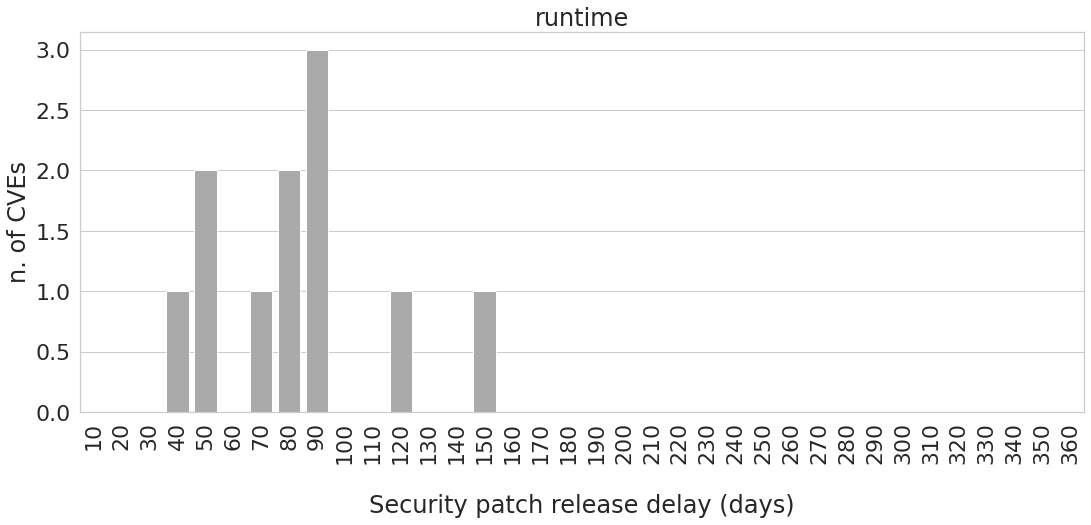

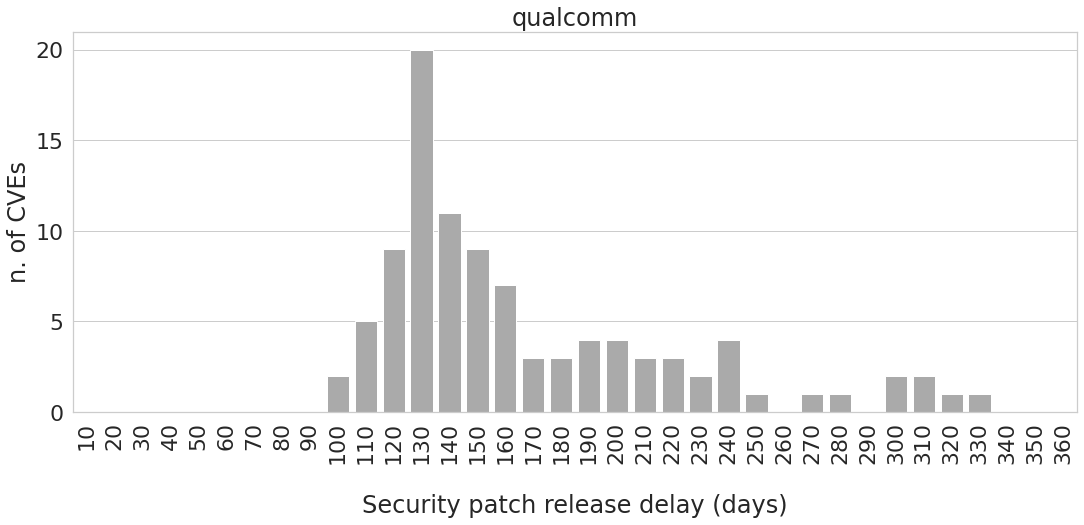

In [ ]:
def get_bins(df):
  days = pd.DataFrame(df["diff"].transform(lambda x: x.days)).rename(columns={"diff": "days"})
  days["bin"] = days["days"] // 10 * 10
  arr = days.groupby("bin").count().reset_index().to_numpy()
  last = 10
  full_arr = []
  for row in arr:
    cur = int(row[0])
    while last < cur:
      full_arr.append([last, 0])
      last += 10
    full_arr.append([int(row[0]), row[1]])
    last = cur + 10
  while last <= 360:
    full_arr.append([last, 0])
    last += 10
  return pd.DataFrame(full_arr, columns=["bin", "days"])

def make_cat_plots(df):
  for cat in CATEGORIES:
    df_cat = df[df["category"] == cat]
    sns.set(rc = {'figure.figsize':(18,7),}, style="whitegrid")
    with sns.plotting_context("notebook", font_scale=2):
      # count = pd.DataFrame(days.groupby(lambda x: days.loc[x]["days"] // 10 * 10).count().reset_index()).rename(columns={"days": "n. of CVEs", "index": "Security patch release delay (days)"})
      # count = pd.DataFrame(days.groupby("bin").count().reset_index()).rename(columns={"days": "n. of CVEs", "bin": "Security patch release delay (days)"})
      count = get_bins(df_cat).rename(columns={"days": "n. of CVEs", "bin": "Security patch release delay (days)"})
      ax = sns.barplot(data=count, x="Security patch release delay (days)", y="n. of CVEs", color="#AAA")
      plt.xticks(rotation=90)
      text = ax.get_xlabel()
      plt.xlabel(text, labelpad=30)
      plt.title(cat)
      plt.show()

# days = pd.DataFrame(df_clean["diff"].transform(lambda x: x.days)).rename(columns={"diff": "days"})
# days["bin"] = days["days"] // 10 * 10

make_cat_plots(df_clean)
# get_bins(df_clean[df_clean["category"] == "kernel"])

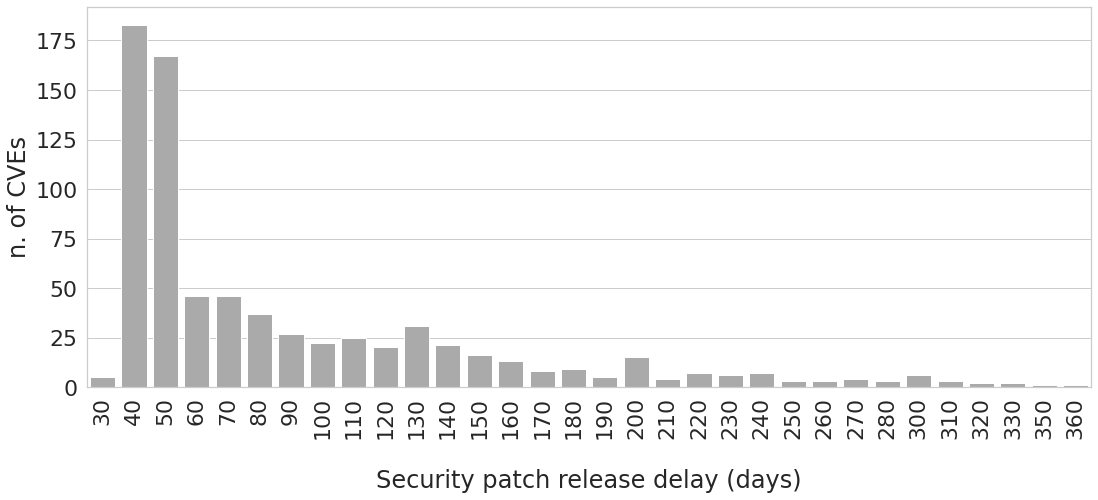

In [ ]:
days = pd.DataFrame(diff_clean.transform(lambda x: x.days), columns=["days"])
sns.set(rc = {'figure.figsize':(18,7),}, style="whitegrid")
with sns.plotting_context("notebook", font_scale=2):
  count = pd.DataFrame(days.groupby(lambda x: days.loc[x]["days"] // 10 * 10).count().reset_index()).rename(columns={"days": "n. of CVEs", "index": "Security patch release delay (days)"})
  ax = sns.barplot(data=count, x="Security patch release delay (days)", y="n. of CVEs", color="#AAA")
  plt.xticks(rotation=90)
  text = ax.get_xlabel()
  plt.xlabel(text, labelpad=30)
  #sns.barplot(data=, x="days", y="count")


Some data with CVSS v3

In [ ]:
# filter for recent bulletins, may remove

df = df[df['bulletin_date'].dt.tz_localize(None) >= np.datetime64('2018-01')]
df

,id,bulletin_date,patch_level,category,published,modified,commit_start,commit_end,nvd_severity,nvd_score,nvd_severity_v3,nvd_score_v3,bulletin_publish,diff
0,CVE-2022-20419,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-10-11 00:00:00+00:00,2022-10-11 00:00:00+00:00,2022-08-03 18:48:33+00:00,2022-08-19 18:43:19+00:00,NaN,NaN,HIGH,7.8,2022-10-03 00:00:00+00:00,44 days 05:16:41
1,CVE-2022-20420,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-10-11 00:00:00+00:00,2022-10-11 00:00:00+00:00,2022-07-14 01:16:52+00:00,2022-08-19 18:43:09+00:00,NaN,NaN,HIGH,7.8,2022-10-03 00:00:00+00:00,44 days 05:16:51
2,CVE-2022-20351,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-10-11 00:00:00+00:00,2022-10-11 00:00:00+00:00,2022-04-28 23:53:40+00:00,2022-05-10 15:30:44+00:00,NaN,NaN,MEDIUM,5.5,2022-10-03 00:00:00+00:00,145 days 08:29:16
3,CVE-2021-39624,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-03-16 00:00:00+00:00,2022-06-15 00:00:00+00:00,2022-03-31 02:06:06+00:00,2022-03-31 02:38:58+00:00,MEDIUM,4.9,MEDIUM,5.5,2022-10-03 00:00:00+00:00,185 days 21:21:02
4,CVE-2021-39758,2022-10-01 00:00:00+00:00,2022-10-01,framework,2022-03-30 00:00:00+00:00,2022-03-30 00:00:00+00:00,2021-11-24 15:49:43+00:00,2021-11-25 10:42:47+00:00,MEDIUM,4.6,HIGH,7.8,2022-10-03 00:00:00+00:00,311 days 13:17:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,CVE-2020-11175,2020-11-01 00:00:00+00:00,2020-11-01,qualcomm,2020-11-12 00:00:00+00:00,2020-11-12 00:00:00+00:00,NaT,NaT,HIGH,7.2,HIGH,7.8,2020-11-02 00:00:00+00:00,NaT
3407,CVE-2020-11184,2020-11-01 00:00:00+00:00,2020-11-01,qualcomm,2020-11-12 00:00:00+00:00,2020-11-12 00:00:00+00:00,NaT,NaT,HIGH,10.0,CRITICAL,9.8,2020-11-02 00:00:00+00:00,NaT
3408,CVE-2020-11193,2020-11-01 00:00:00+00:00,2020-11-01,qualcomm,2020-11-12 00:00:00+00:00,2020-11-12 00:00:00+00:00,NaT,NaT,HIGH,10.0,CRITICAL,9.8,2020-11-02 00:00:00+00:00,NaT
3409,CVE-2020-11196,2020-11-01 00:00:00+00:00,2020-11-01,qualcomm,2020-11-12 00:00:00+00:00,2020-11-12 00:00:00+00:00,NaT,NaT,HIGH,10.0,CRITICAL,9.8,2020-11-02 00:00:00+00:00,NaT


In [ ]:
df["nvd_score_v3"].mean()

7.538276923076922

In [ ]:
df[["id", "nvd_severity_v3"]].groupby("nvd_severity_v3").count()

,id
nvd_severity_v3,
CRITICAL,278
HIGH,940
LOW,14
MEDIUM,393


# Samsung Patches

In [ ]:
samsung_builds = "drive/My Drive/cves_temp/patches-valid-v2.csv"

devices = pd.read_csv(samsung_builds)
devices["release_date"] = pd.to_datetime(devices["release_date"], utc=True)
devices["patch_date"] = pd.to_datetime(devices["patch"].map(lambda x: date_dict[x]), utc=True)
devices["patch"] = pd.to_datetime(devices["patch"], utc=True)
devices

,id,model,csc,patch,release_date,build,patch_date
0,SM-F936B-EUX,SM-F936B,EUX,2022-12-01 00:00:00+00:00,2022-12-28 00:00:00+00:00,F936BXXU1BVL7,2022-12-05 00:00:00+00:00
1,SM-F936B-EUX,SM-F936B,EUX,2022-12-01 00:00:00+00:00,2022-12-08 00:00:00+00:00,F936BXXS1BVKC,2022-12-05 00:00:00+00:00
2,SM-F936B-EUX,SM-F936B,EUX,2022-11-01 00:00:00+00:00,2022-11-22 00:00:00+00:00,F936BXXU1BVK3,2022-11-07 00:00:00+00:00
3,SM-F936B-EUX,SM-F936B,EUX,2022-11-01 00:00:00+00:00,2022-11-08 00:00:00+00:00,F936BXXS1AVJE,2022-11-07 00:00:00+00:00
4,SM-F936B-EUX,SM-F936B,EUX,2022-10-01 00:00:00+00:00,2022-10-20 00:00:00+00:00,F936BXXS1AVJ3,2022-10-03 00:00:00+00:00
...,...,...,...,...,...,...,...
9842,SM-M205F-XSG,SM-M205F,XSG,2019-08-01 00:00:00+00:00,2019-10-04 00:00:00+00:00,M205FDDU2BSH3,2019-08-05 00:00:00+00:00
9843,SM-M205F-XSG,SM-M205F,XSG,2019-05-01 00:00:00+00:00,2019-07-22 00:00:00+00:00,M205FDDU1BSF4,2019-05-06 00:00:00+00:00
9844,SM-M205F-XSG,SM-M205F,XSG,2019-05-01 00:00:00+00:00,2019-06-22 00:00:00+00:00,M205FDDU1BSF1,2019-05-06 00:00:00+00:00
9845,SM-M205F-XSG,SM-M205F,XSG,2019-03-01 00:00:00+00:00,2019-04-27 00:00:00+00:00,M205FDDU1ASD3,2019-03-04 00:00:00+00:00


In [ ]:
ids = devices["id"].unique()


print("Model & CSC & Model & CSC & Model & CSC \\\\")
print ("\\hline")

cont = 0
line = ""
for id in ids:
  model, csc = id.rsplit("-", 1)
  line += f"{model} & {csc}"
  if cont == 2:
    print(f"{line} \\\\")
    line = ""
    cont = 0
  else:
    line += " & "
    cont += 1



Model & CSC & Model & CSC & Model & CSC \\
\hline
SM-F936B & EUX & SM-F936B & EVR & SM-F936B & INS \\
SM-F936B & CAU & SM-F936B & GTO & SM-F936B & ZTO \\
SM-F936B & XSG & SM-F721B & EUX & SM-F721B & EVR \\
SM-F721B & INS & SM-F721B & CAU & SM-F721B & GTO \\
SM-F721B & ZTO & SM-F721B & XSG & SM-G736B & EUX \\
SM-G736B & BRI & SM-G736B & XSG & SM-E135F & INS \\
SM-M135F & EUX & SM-M135F & BRI & SM-M135F & XSG \\
SM-M536B & EUX & SM-M536B & BRI & SM-M536B & INS \\
SM-M536B & ZTO & SM-M536B & XSG & SM-M536B & SER \\
SM-A736B & INS & SM-A736B & CAU & SM-A736B & GTO \\
SM-A736B & ZTO & SM-A736B & XSG & SM-A736B & SER \\
SM-A536B & EUX & SM-A536B & EVR & SM-A336B & EUX \\
SM-A336B & EVR & SM-A336B & CAU & SM-A336B & SER \\
SM-M336B & EUX & SM-M336B & BRI & SM-M336B & GTO \\
SM-M336B & XSG & SM-M336B & SER & SM-M336B & TGY \\
SM-M236B & EUX & SM-M236B & GTO & SM-M236B & ZTO \\
SM-M236B & XSG & SM-M236B & SER & SM-E236B & INS \\
SM-A236B & EUX & SM-A236B & EVR & SM-A235F & INS \\
SM-A235F & CAU

In [ ]:
count = pd.DataFrame(devices.groupby("id")["id"].count())

In [ ]:
len(devices["id"].unique())

547

In [ ]:
devices["release_date"].max()

Timestamp('2022-12-30 00:00:00+0000', tz='UTC')

since there can be multiple updates with the same security patch level, we only keep the first for each model

In [ ]:
devices = devices.sort_values(["id", "patch", "release_date"]).drop_duplicates(["id", "patch"])
#devices["prev_patch"] = devices["patch"].shift(1)
devices

,id,model,csc,patch,release_date,build,patch_date
7287,SM-A015F-CAU,SM-A015F,CAU,2020-03-01 00:00:00+00:00,2020-03-09 00:00:00+00:00,A015FXXU2ATB5,2020-03-02 00:00:00+00:00
7284,SM-A015F-CAU,SM-A015F,CAU,2020-06-01 00:00:00+00:00,2020-07-01 00:00:00+00:00,A015FXXS2ATF3,2020-06-01 00:00:00+00:00
7283,SM-A015F-CAU,SM-A015F,CAU,2020-08-01 00:00:00+00:00,2020-08-25 00:00:00+00:00,A015FXXU3ATG5,2020-08-03 00:00:00+00:00
7282,SM-A015F-CAU,SM-A015F,CAU,2020-09-01 00:00:00+00:00,2020-09-17 00:00:00+00:00,A015FXXU3ATI2,2020-09-08 00:00:00+00:00
7281,SM-A015F-CAU,SM-A015F,CAU,2020-11-01 00:00:00+00:00,2020-12-23 00:00:00+00:00,A015FXXS3ATL1,2020-11-02 00:00:00+00:00
...,...,...,...,...,...,...,...
384,SM-X906B-XSG,SM-X906B,XSG,2022-08-01 00:00:00+00:00,2022-09-13 00:00:00+00:00,X906BXXU2AVH2,2022-08-01 00:00:00+00:00
383,SM-X906B-XSG,SM-X906B,XSG,2022-11-01 00:00:00+00:00,2022-11-23 00:00:00+00:00,X906BXXU2BVK4,2022-11-07 00:00:00+00:00
382,SM-X906B-ZTO,SM-X906B,ZTO,2022-05-01 00:00:00+00:00,2022-08-18 00:00:00+00:00,X906BXXU2AVGB,2022-05-02 00:00:00+00:00
381,SM-X906B-ZTO,SM-X906B,ZTO,2022-08-01 00:00:00+00:00,2022-09-23 00:00:00+00:00,X906BXXU2AVH7,2022-08-01 00:00:00+00:00


We define early updates as updates that are published before the bulletin, and late updates as updates that come more than 60 days after the bulletin publication.

We count the number of early and late updates, as well as the min, max, mean and median delay. We also calculate the 75 percentile, which indicates that minimum delay for the latest 25% of updates

mean: 24 days 23:22:20.420873373
median: 22 days 00:00:00
75 percentile: 34 days 00:00:00
min: -14 days +00:00:00
max: 168 days 00:00:00
number of early updates: 272/8221
number of late updates: 455/8221


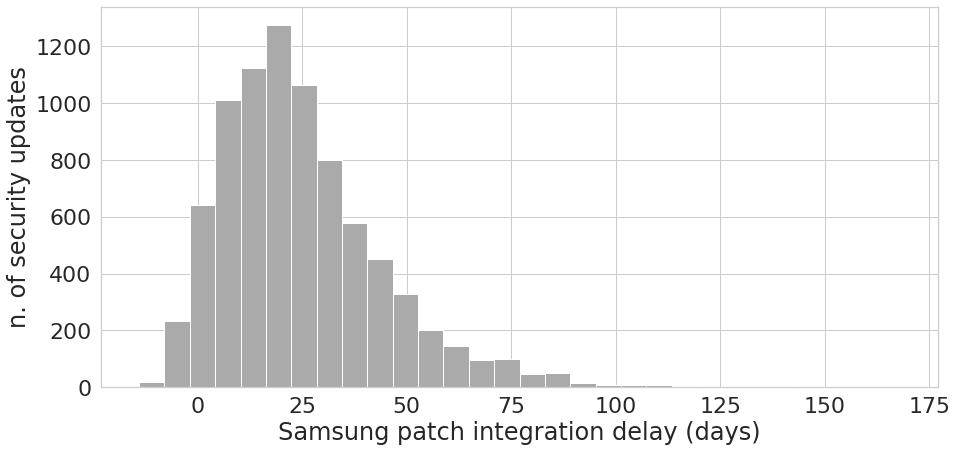

In [ ]:
def show_devices(devices, bins=30):
  # compute difference between security_patch and its release date
  sam_diff = pd.DataFrame(devices["release_date"] - devices["patch_date"], columns=["diff"])
  # remove some outliers. Since some models have a 6-month release schedule, we
  # use 190 days as the upper bound
  sam_diff = sam_diff[sam_diff["diff"] < np.timedelta64(190, 'D')]
  late_num = sam_diff[sam_diff["diff"] >= np.timedelta64(60, 'D')].count()["diff"]
  early_num = sam_diff[sam_diff["diff"] < np.timedelta64(0)].count()["diff"]

  min_delay = sam_diff['diff'].min()
  max_delay = sam_diff['diff'].max()

  print(f"mean: {sam_diff['diff'].mean()}")
  print(f"median: {sam_diff['diff'].median()}")
  print(f"75 percentile: {sam_diff['diff'].quantile(0.75)}")
  print(f"min: {min_delay}")
  print(f"max: {max_delay}")
  print(f"number of early updates: {early_num}/{sam_diff.shape[0]}")
  print(f"number of late updates: {late_num}/{sam_diff.shape[0]}")
  sam_diff["days"] = sam_diff["diff"].map(lambda d: d.days)
  sns.set(rc = {'figure.figsize':(15,7)}, style="whitegrid")
  plt.figure()
  
  with sns.plotting_context("notebook", font_scale=2):
    sns.histplot(sam_diff["days"], bins=bins, color="#AAA", alpha=1)
    plt.xlabel("Samsung patch integration delay (days)")
    plt.ylabel("n. of security updates")

show_devices(devices)

Since after a bulletin is published an update is not guaranteed to be published as well, we can compute the time between two successive updates

In [ ]:
updates = pd.DataFrame(devices.sort_values(["id", "release_date"]))
updates["update_diff"] = pd.Timedelta("nan")
diff_col = updates.columns.get_loc('update_diff')
release_col = updates.columns.get_loc('release_date')
id_col = updates.columns.get_loc('id')

for i in range(1, len(updates)):
  if updates.iloc[i-1, id_col] == updates.iloc[i, id_col]:
    updates.iloc[i, diff_col] = updates.iloc[i, release_col] - updates.iloc[i-1, release_col]
updates["update_diff"] = pd.to_timedelta(updates["update_diff"])

In [ ]:
updates["update_diff"].mean()

Timedelta('46 days 18:25:59.343236904')

In [ ]:
updates.groupby("patch").mean()["update_diff"]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


patch
2019-01-01 00:00:00+00:00                          NaT
2019-02-01 00:00:00+00:00             33 days 00:00:00
2019-03-01 00:00:00+00:00   28 days 07:23:04.615384615
2019-04-01 00:00:00+00:00   31 days 22:54:32.727272727
2019-05-01 00:00:00+00:00   46 days 06:18:56.842105263
2019-06-01 00:00:00+00:00             29 days 11:00:00
2019-07-01 00:00:00+00:00             40 days 18:40:00
2019-08-01 00:00:00+00:00   61 days 23:18:51.428571429
2019-09-01 00:00:00+00:00   47 days 23:17:38.823529412
2019-10-01 00:00:00+00:00   52 days 03:09:28.421052632
2019-11-01 00:00:00+00:00   48 days 05:38:49.411764706
2019-12-01 00:00:00+00:00             49 days 19:44:00
2020-01-01 00:00:00+00:00   47 days 05:27:16.363636363
2020-02-01 00:00:00+00:00   47 days 07:45:52.941176470
2020-03-01 00:00:00+00:00             46 days 06:40:00
2020-04-01 00:00:00+00:00   51 days 01:11:17.227722772
2020-05-01 00:00:00+00:00   47 days 16:51:53.513513513
2020-06-01 00:00:00+00:00   43 days 13:17:08.571428571
2020

We can also do the same thing grouping by model

In [ ]:
by_model = updates[["id", "update_diff"]].groupby("id").agg(lambda x: x.mean())
by_model["update_diff"].agg(lambda x: x.mean())
# print(updates["update_diff"].mean())
# print(updates["update_diff"].median())

Timedelta('53 days 23:48:51.392521043')

Alternatively, we can create "fake" updates for missing security patches, and set their release date as the release date of the next patch. For example, if a phone recceived updates with security patch level `2021-07-01` and `2021-09-01`, we can create a fake update with security patch level `2021-08-01` and use the release date of the `2021-09-01` as its release date. This way we take into account the fact that devices do not receive an update every month

In [ ]:
fake_patches = []
for id in devices["id"].unique():
  filtered = devices[devices['id']==id]
  first_patch = filtered["patch"].iloc[0]
  last_patch = filtered["patch"].iloc[-1]
  #print(f"{first_patch -last_patch} {id}")
  date = last_patch
  cur_next = filtered["release_date"].iloc[-1]


  while date > first_patch:
    res = filtered[filtered['patch'] == date]
    if len(res) < 1:
      patch_date = pd.to_datetime(date_dict[date.strftime("%Y-%m-%d")], utc=True)
      fake_patches.append({"id": id, "patch":date, "release_date": cur_next, "patch_date": patch_date})
    else:
      cur_next = res["release_date"].iloc[0]
    date = date - pd.DateOffset(months=1)

fake_patches = pd.DataFrame(fake_patches)
devices_aug = devices.append(fake_patches)

mean: 42 days 13:55:03.691630674
median: 32 days 00:00:00
75 percentile: 63 days 00:00:00
min: -14 days +00:00:00
max: 189 days 00:00:00
number of early updates: 272/12271
number of late updates: 3214/12271


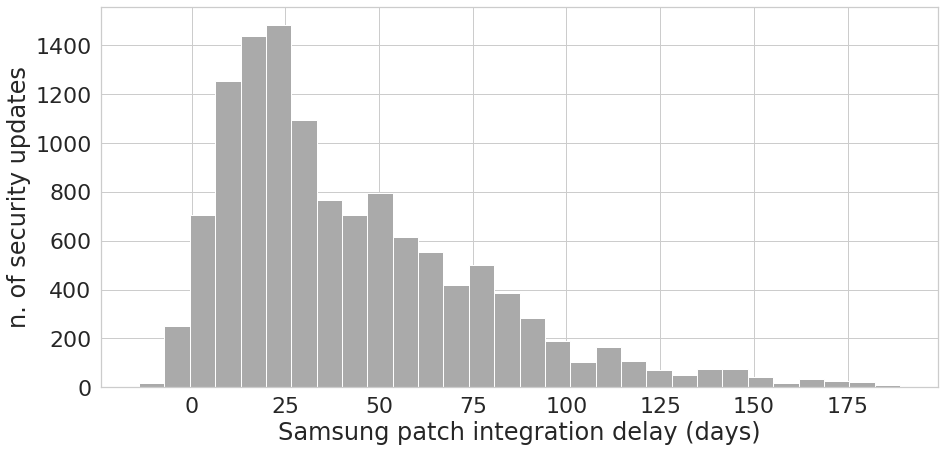

In [ ]:
show_devices(devices_aug)